# Homework n.1

Evaluate numerically and plot graphically the convolution integral of the
energy spectrum f(E) with a gaussian resolution g(E) defined below.

>$f(E) = a_1 f_1(E) + a_2 f_2(E) + a_3 f_3(E)$

where:

>$f_1(E)= 1/E \quad \text{for}  \quad 0.1 < E < 0.92 MeV$
>
>$f_1(E)= 0 \quad \text{for}  \quad E <0.1 or E> 0.92 MeV$
>
>$f_2(E)=G(μ=1.17 MeV, \sigma=0.001 MeV)$
>
>$f_3(E)=G(μ=1.33 MeV, \sigma=0.001 MeV)$
>
>$a_1 = 1$;
>$a_2 = 0.9$;
>$a_3 = 0.8$

 Consider the following cases:
 1. g(E)=G(E,s) with s/E = 5%/√E(MeV)
 2. g(E)=G(E,s) with s/E = 10%/√E(MeV)
 3. g(E)=G(E,s) with s/E = 30%/√E(MeV)
 4. g(E)=G(E,s) with s/E = 1%/√E(MeV)
 
(optional) Invent yourself an f(E) distribution with sharp edges or peaks and
repeat the previous exercise to point out the effect of different resolutions on f(E).

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy import vectorize

We define the functions Gaussian and f(E) and vectorize them in order to pass a vector as an argument.

In [2]:
def Gaussian(x,mean, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mean)**2/(2*sigma**2))


def f1(x):
    if (x < 0.1 or x > 0.92) :
        return 0.
    else :
        return float(1/x)
vf1 = vectorize(f1)



def f(x):
    return 1*vf1(x) #+ 0.9*Gaussian(x,1.17,0.001) + 0.8*Gaussian(x,1.3,0.001)

vf = vectorize(f)

Then we define the function we want to integrate and a function to make the convolution.

In [3]:
def integrand(t, x, percent):
    return f(t)*Gaussian(t,x,percent*np.sqrt(x))



def convolve(step, x0, percent):
    dx = step
    t = np.arange(0,100,step)
    return np.sum(dx*integrand(t,x0,percent))

vconvolve = vectorize(convolve)

Then we need a vector for the coordinates on the x axis

In [4]:
a = 0.01
b = 2
dx = 0.001
x = np.arange(a,b,dx)

And finally we convolve f(E) with the resolution for the requested cases. The variable step characterizes the width of the increment dE.

In [7]:
step = 0.005
# y = vconvolve(step,x,0.05)
y1=vconvolve(step, x,0.1)
# y2=vconvolve(step,x,0.3)
# y3=vconvolve(step,x,0.01)

np.save('res10_data', [x,y1])

1990

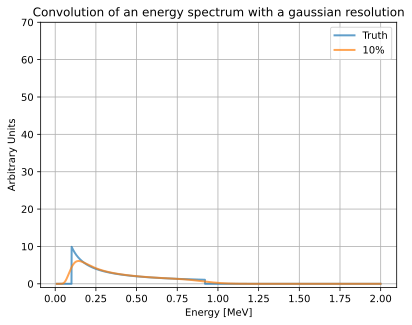

In [9]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.title('Convolution of an energy spectrum with a gaussian resolution')
plt.plot(x, vf(x),lw = 2, label = 'Truth', alpha = 0.7)
# plt.plot(x, y,lw = 2, label = '5%', alpha = 0.7)
plt.plot(x,y1,lw = 2, label = '10%', alpha = 0.7)
# plt.plot(x,y2,lw = 2, label = '30%', alpha = 0.7)
# plt.plot(x,y3,lw = 2, label = '1%', alpha = 0.7)
plt.xlabel('Energy [MeV]')
plt.ylabel('Arbitrary Units')
plt.legend()
plt.ylim(-1,70)
plt.grid()
plt.show()

As a double check we assure that the integral under the curves is more or less the same. Obviously the areas will agree better as the integration step decreases.

In [10]:
from numpy import trapz

# area = trapz(y, dx=dx)
# print("area (5%) =", area)

area = trapz(y1, dx=dx)
print("area (10%)  =", area)

# area = trapz(y2, dx=dx)
# print("area (30%) =", area)

# area = trapz(y3, dx=dx)
# print("area (1%) =", area)

area (10%)  = 2.247126695273289


## Optional part

As a simple optional spectrum we take a fac simile of the first 4 S-states of bottomonium ($\Upsilon(1S), \Upsilon(2S), \Upsilon(3S), \Upsilon(4S)$). The total width of the states is 100 times narrower than the plotted one for 1S,2S,3S. This has been done just to save computational time.

In [ ]:
def f(x):
    y = 0.31*Gaussian(x,9.46030, 0.005402) + 0.08*Gaussian(x,10.02326, 0.003198) + 0.04*Gaussian(x,10.3552, 0.002032) + 0.1*Gaussian(x,10.5794, 0.0205)
    return y

In [ ]:
a = 9
b = 11
dx = 0.001
x = np.arange(a,b,dx)
plt.plot(x,f(x));

In [ ]:
def integrand(t, x, percent):
    return f(t)*Gaussian(t,x,percent*np.sqrt(x))



def convolve(step, x0, percent):
    dx = step
    t = np.arange(8,12,step)
    return np.sum(dx*integrand(t,x0,percent))

vconvolve = vectorize(convolve)

In [ ]:
step = 0.005
y = vconvolve(step,x,0.05)
y1=vconvolve(step, x,0.1)
y2=vconvolve(step,x,0.3)
y3=vconvolve(step,x,0.01)

In [ ]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.title('Convolution of Bottomonium S states with a gaussian resolution')
plt.plot(x, f(x),lw = 1, label = 'Truth')
plt.plot(x, y,lw = 1, label = '5%')
plt.plot(x,y1,lw = 1, label = '10%')
plt.plot(x,y2,lw = 1, label = '30%')
plt.plot(x,y3,lw = 1, label = '1%')
plt.xlabel('Energy [GeV]')
plt.ylabel('Arbitrary Units')
plt.legend()
plt.grid()
plt.show()